In [59]:
import json
import numpy
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time

In [55]:
import os
import baseline
import pandas as pd
import numpy as np
#TEMPORARILY SUPPRESS WARNINGS
import warnings

warnings.filterwarnings("ignore")

# which images have which annotations

In [34]:
captions_train_path = "/mnt/muthderd/MIDS/W210/data/annotations_trainval2017/annotations/captions_train2017.json"
captions_val_path = "/mnt/muthderd/MIDS/W210/data/annotations_trainval2017/annotations/captions_val2017.json"
#captions_train  = json.loads(open(captions_train_path).read())

In [35]:
inst_train_path = "/mnt/muthderd/MIDS/W210/data/annotations_trainval2017/annotations/instances_train2017.json"
inst_val_path = "/mnt/muthderd/MIDS/W210/data/annotations_trainval2017/annotations/instances_val2017.json"
#inst_train  = json.loads(open(inst_train_path).read())

In [36]:
def get_electronics_info(captions_path, inst_path):
    captions  = json.loads(open(captions_path).read())
    inst  = json.loads(open(inst_path).read())
    image_df = pd.DataFrame(inst['images'])
    annotation_df = pd.DataFrame(inst['annotations'])
    #the 'id' in image_df needs to be changed to 'image_id' in order to join with annotations_df
    renamed_image_df = image_df.copy(deep=True)
    renamed_image_df.rename(columns={'id':'image_id'}, inplace=True)
    images_and_annotations_df = annotation_df.merge(renamed_image_df,on='image_id', how='left')
    electronics_only_merged_df = images_and_annotations_df.loc[(images_and_annotations_df['category_id'] >= 72) & (images_and_annotations_df['category_id'] <= 77)]
    
    #select all images that contain electronics
    #all_images_with_electronics = list(pd.Series(electronics_only_merged_df['image_id']).unique())
    
    return(electronics_only_merged_df)

In [37]:
train_electronics = get_electronics_info(captions_train_path, inst_train_path)
val_electronics = get_electronics_info(captions_val_path, inst_val_path)

In [38]:
train_electronics.head()

area                            bbox  category_id     id  \
341   9919.64620  [308.43, 35.25, 126.4, 108.71]           72  28405   
342  66958.31445  [319.77, 9.19, 319.77, 286.26]           72  28473   
343  15215.62820  [394.5, 42.74, 143.19, 143.19]           72  28633   
344  21650.08250   [48.9, 27.33, 165.39, 149.57]           72  28660   
345   3906.61265   [516.13, 236.31, 63.95, 67.7]           72  28685   

     image_id  iscrowd                                       segmentation  \
341    275781        0  [[316.85, 102.67, 308.43, 63.9, 414.61, 35.25,...   
342    403107        0  [[328.39, 10.15, 319.77, 206.42, 616.57, 295.4...   
343    203085        0  [[414.41, 46.53, 514.93, 42.74, 513.04, 93.95,...   
344    520862        0  [[205.66, 156.76, 179.78, 158.2, 191.28, 169.7...   
345    225913        0  [[516.96, 242.13, 516.13, 288.64, 524.02, 291....   

                                              coco_url        date_captured  \
341  http://images.cocodataset.org/train2017/000000...  2013-11-14 23:31:26   
342  http://images.cocodataset.org/train2017/000000...  2013-11-15 15:01:19   
343  http://images.cocodataset.org/train2017/000000...  2013-11-15 13:00:53   
344  http://images.cocodataset.org/train2017/000000...  2013-11-14 21:33:34   
345  http://images.cocodataset.org/train2017/000000...  2013-11-14 22:16:49   

            file_name                                         flickr_url  \
341  000000275781.jpg  http://farm4.staticflickr.com/3170/2601758661_...   
342  000000403107.jpg  http://farm4.staticflickr.com/3047/3154457418_...   
343  000000203085.jpg  http://farm9.staticflickr.com/8065/8201625616_...   
344  000000520862.jpg  http://farm4.staticflickr.com/3376/3631630894_...   
345  000000225913.jpg  http://farm4.staticflickr.com/3152/2642920071_...   

     height  license  width  
341     375        3    500  
342     427        3    640  
343     422        1    600  
344     640        2    480  
345     480        1    640

In [39]:
val_electronics.head()

area                              bbox  category_id     id  \
48   31935.48505  [279.11, 209.81, 206.02, 160.44]           72  29131   
49    2293.67560     [97.28, 202.37, 60.28, 39.91]           72  29249   
50  265862.40795       [1.08, 1.72, 574.7, 471.39]           72  29555   
51   61254.97715       [3.88, 0.0, 287.98, 251.13]           72  29829   
52   16606.20565  [145.26, 214.29, 165.39, 107.87]           72  30246   

    image_id  iscrowd                                       segmentation  \
48    464476        0  [[279.11, 370.25, 281.96, 214.56, 283.86, 209....   
49     68833        0  [[100.23, 203.21, 133.68, 202.93, 155.88, 202....   
50    433915        0  [[388.52, 2.8, 567.17, 15.71, 574.71, 234.19, ...   
51    149222        0  [[4.46, 19.19, 12.67, 95.55, 16.77, 133.31, 33...   
52     17379        0  [[284.76, 320.72, 267.51, 322.16, 247.37, 322....   

                                             coco_url        date_captured  \
48  http://images.cocodataset.org/val2017/00000046...  2013-11-14 18:23:40   
49  http://images.cocodataset.org/val2017/00000006...  2013-11-14 16:32:09   
50  http://images.cocodataset.org/val2017/00000043...  2013-11-14 19:04:41   
51  http://images.cocodataset.org/val2017/00000014...  2013-11-15 15:11:24   
52  http://images.cocodataset.org/val2017/00000001...  2013-11-15 01:16:56   

           file_name                                         flickr_url  \
48  000000464476.jpg  http://farm1.staticflickr.com/24/35275654_7d93...   
49  000000068833.jpg  http://farm8.staticflickr.com/7152/6427642465_...   
50  000000433915.jpg  http://farm4.staticflickr.com/3519/3243850638_...   
51  000000149222.jpg  http://farm1.staticflickr.com/23/33195394_22d6...   
52  000000017379.jpg  http://farm6.staticflickr.com/5123/5316824279_...   

    height  license  width  
48     375        3    500  
49     480        1    640  
50     480        3    640  
51     383        2    500  
52     640        1    478

In [65]:
#extract electronics IDs in each image
eIDs_in_images = val_electronics.groupby('image_id')['category_id'].apply(list).to_dict()

In [40]:
#select all images that contain electronics
train_images_with_electronics = list(pd.Series(train_electronics['image_id']).unique())
val_images_with_electronics = list(pd.Series(val_electronics['image_id']).unique())

In [43]:
val_images_with_electronics[:10]

[464476, 68833, 433915, 149222, 17379, 361586, 127987, 186632, 440475, 368900]

In [42]:
len(val_images_with_electronics)

597

In [49]:
val_folder_name = '/mnt/muthderd/MIDS/W210/data/val2017/'
all_val_filenames = os.listdir(val_folder_name)

In [50]:
max_file_id_length = len(all_val_filenames[0]) - 4#subtract 4 for the '.jpg' suffix

In [51]:
files_to_open = []
for image_id in val_images_with_electronics:
    file_id = str(image_id)
    zeros_to_add = max_file_id_length-len(file_id)
    filename = ('0'*zeros_to_add) + file_id + '.jpg'
    files_to_open.append(filename)

In [53]:
files_to_open[:10]

['000000464476.jpg',
 '000000068833.jpg',
 '000000433915.jpg',
 '000000149222.jpg',
 '000000017379.jpg',
 '000000361586.jpg',
 '000000127987.jpg',
 '000000186632.jpg',
 '000000440475.jpg',
 '000000368900.jpg']

Total Annotations:  428


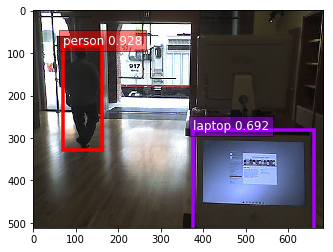

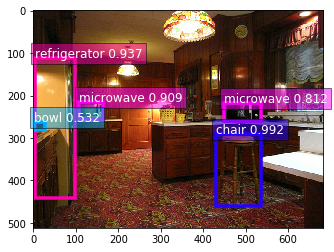

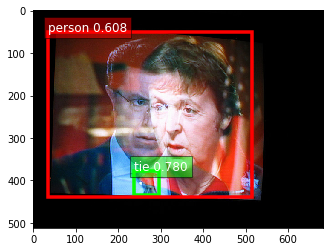

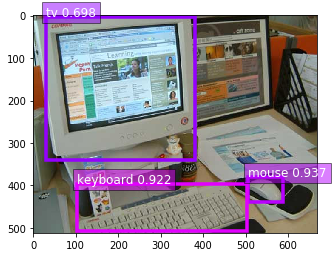

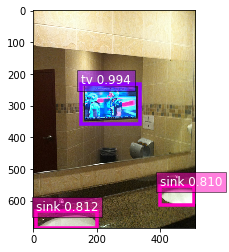

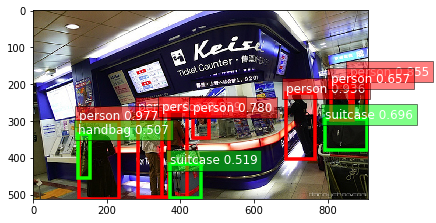

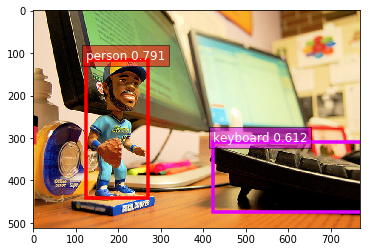

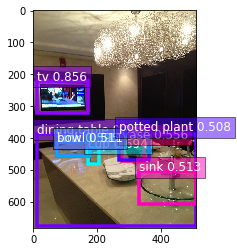

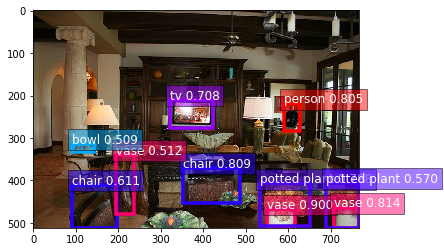

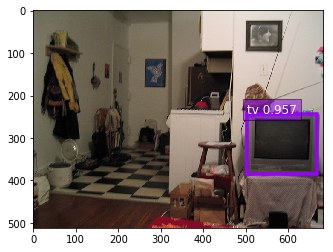

In [58]:
results_folder = '/mnt/muthderd/MIDS/W210/data/val_results/'
data_folder = '/mnt/muthderd/MIDS/W210/data/val2017/'

#test_filenames = os.listdir(data_folder)
test_filenames = files_to_open[:10]

all_test_annotations = pd.DataFrame(columns=['image_id', 'class_id', 'scores', 1, 2, 3, 4])

baseline_model = baseline.BaselineClassifier(model='yolo3_darknet53_coco')

for image in test_filenames:
    class_ids, scores, bounding_boxes = baseline_model.classify_objects(image, data_folder, results_folder)
    
    class_id_series = pd.Series(class_ids[0].asnumpy().reshape(len(class_ids[0]),))
    score_series = pd.Series(scores[0].asnumpy().reshape(len(scores[0]),))
    b_box_DF = pd.DataFrame(bounding_boxes[0].asnumpy().reshape(len(bounding_boxes[0]),4), columns=[1,2,3,4])
    
    class_id_series[class_id_series>-1]
    score_series[class_id_series>-1]
    b_box_DF[class_id_series>-1]
    
    test_annotations = b_box_DF[class_id_series>-1]
    test_annotations['class_id'] = class_id_series[class_id_series>-1]
    test_annotations['scores'] = score_series[class_id_series>-1]
    
    test_annotations['image_id'] = [image[:-4]]*len(test_annotations)
    test_annotations = test_annotations[['image_id', 'class_id', 'scores', 1, 2, 3, 4]]
    
    all_test_annotations = pd.concat([all_test_annotations, test_annotations], ignore_index=True)
    
print("Total Annotations: ", str(len(all_test_annotations)))

In [60]:
all_test_annotations[:10]

image_id  class_id    scores           1           2           3  \
0  000000464476       0.0  0.927936   70.859024   81.128845  162.252640   
1  000000464476      63.0  0.692063  376.342072  282.334595  660.263550   
2  000000464476      62.0  0.356848  376.498962  289.023132  657.539246   
3  000000464476       7.0  0.326432  194.305130   31.842560  372.927612   
4  000000464476       6.0  0.145672  194.305130   31.842560  372.927612   
5  000000464476      62.0  0.126344  206.427979   34.587311  375.598083   
6  000000464476       6.0  0.069344   27.974426   10.990707  389.384888   
7  000000464476      62.0  0.059397  374.799011   49.534012  609.736023   
8  000000464476      26.0  0.021826   72.883919  173.170853   97.293861   
9  000000464476      59.0  0.014199  376.342072  282.334595  660.263550   

            4  
0  329.081268  
1  518.431458  
2  509.743530  
3  205.119370  
4  205.119370  
5  202.875259  
6  263.213196  
7  288.754211  
8  224.006027  
9  518.431458

In [61]:
all_test_annotations.to_csv('val_result_annotations.csv')

In [90]:
pred_prob_threshold = 0.5
result_annotations = all_test_annotations[all_test_annotations['scores']>pred_prob_threshold]
eIDs_in_results = result_annotations.groupby('image_id')['class_id'].apply(list).to_dict()
eIDs_in_results

{'000000017379': [62.0, 71.0, 71.0],
 '000000068833': [56.0, 72.0, 68.0, 68.0, 45.0],
 '000000127987': [0.0, 66.0],
 '000000149222': [64.0, 66.0, 62.0],
 '000000186632': [60.0, 62.0, 41.0, 71.0, 75.0, 71.0, 45.0, 58.0],
 '000000361586': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0, 0.0, 28.0, 26.0],
 '000000368900': [62.0],
 '000000433915': [27.0, 0.0],
 '000000440475': [75.0, 75.0, 56.0, 0.0, 58.0, 62.0, 56.0, 58.0, 75.0, 45.0],
 '000000464476': [0.0, 63.0]}

In [95]:
#quick hack to deal with the fact that the class IDs predicted by the baseline model are 10 lower than those in the annotation file
#and to throw out non electronics identified
predicted_eIDs = {}
for image_id in eIDs_in_results.keys():
    corrected_IDs = np.add(eIDs_in_results[image_id],10).astype(int)
    llimit = corrected_IDs >= 72
    ulimit = corrected_IDs <=77
    #print(llimit & ulimit)
    corrected_IDs = corrected_IDs[llimit & ulimit]
    #eIDs_in_results[image_id] = list(corrected_IDs)
    predicted_eIDs[int(image_id)] = list(corrected_IDs)
predicted_eIDs

{17379: [72],
 68833: [],
 127987: [76],
 149222: [74, 76, 72],
 186632: [72],
 361586: [],
 368900: [72],
 433915: [],
 440475: [72],
 464476: [73]}

In [96]:
pred_counts = [0, 0, 0, 0, 0, 0]#can use a smarter structure here
label_counts = [0, 0, 0, 0, 0, 0]
for image_id in predicted_eIDs.keys():
    labels = eIDs_in_images[image_id]
    for label in labels:
        label_counts[label-72] += 1
    preds = predicted_eIDs[image_id]
    for pred in preds:
        pred_counts[pred-72] += 1

In [97]:
pred_counts

[5, 1, 1, 0, 2, 0]

In [98]:
label_counts

[17, 0, 1, 0, 2, 0]

In [99]:
np.divide(pred_counts, label_counts)

array([0.29411765,        inf, 1.        ,        nan, 1.        ,
              nan])

In [69]:
eIDs_in_images

{139: [72, 72],
 1268: [77],
 1296: [77],
 1503: [73, 74, 76, 72, 74],
 1675: [76],
 3661: [76],
 3934: [75, 75],
 4495: [72],
 4795: [73, 72],
 5060: [77],
 6763: [72, 77],
 6771: [77],
 7795: [75],
 9400: [73, 73, 73, 73, 74, 76, 73, 76, 76, 76, 76],
 9483: [72, 74, 76, 72, 72],
 9772: [72],
 10707: [75, 73, 75, 75],
 11813: [73],
 12280: [72],
 12576: [72],
 12670: [77],
 13659: [73, 73, 72],
 13729: [75, 75],
 13923: [72],
 14038: [72, 77],
 14226: [73],
 15335: [77],
 15497: [74],
 16439: [73],
 16598: [77],
 17379: [72],
 19786: [73, 75, 75],
 21503: [74, 75, 76],
 22371: [73],
 22623: [77],
 23899: [75, 75, 75, 75, 75],
 24610: [73],
 25560: [72],
 26465: [77, 73, 76, 75],
 26564: [73, 74, 76, 72, 74],
 27186: [75],
 27620: [73, 76, 74, 76, 76],
 29596: [72],
 31296: [77],
 32610: [73, 73, 73, 73, 73, 73],
 32887: [77],
 34873: [72],
 35279: [77, 73, 77],
 36660: [77, 77, 77, 77],
 36844: [72, 75, 72],
 36936: [72, 77, 75, 75],
 37670: [75],
 37740: [72, 73, 74, 76, 76],
 38576:

In [22]:
test = json.loads(open(captions_val_path).read())

In [23]:
test

{'info': {'description': 'COCO 2017 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2017,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'licenses': [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
   'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
   'id': 2,
   'name': 'Attribution-NonCommercial License'},
  {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
   'id': 3,
   'name': 'Attribution-NonCommercial-NoDerivs License'},
  {'url': 'http://creativecommons.org/licenses/by/2.0/',
   'id': 4,
   'name': 'Attribution License'},
  {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
   'id': 5,
   'name': 'Attribution-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
   'id': 6,
   'name': 'Attribution-NoDerivs License'},
  {'url': 'http://flickr.com/commons/usage/',
   'id': 7,
   'name': 'No kn

In [28]:
test2 = json.loads(open(inst_val_path).read())

In [29]:
test2

{'info': {'description': 'COCO 2017 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2017,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'licenses': [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
   'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
   'id': 2,
   'name': 'Attribution-NonCommercial License'},
  {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
   'id': 3,
   'name': 'Attribution-NonCommercial-NoDerivs License'},
  {'url': 'http://creativecommons.org/licenses/by/2.0/',
   'id': 4,
   'name': 'Attribution License'},
  {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
   'id': 5,
   'name': 'Attribution-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
   'id': 6,
   'name': 'Attribution-NoDerivs License'},
  {'url': 'http://flickr.com/commons/usage/',
   'id': 7,
   'name': 'No kn

In [30]:
test3 = json.loads(open("/mnt/muthderd/MIDS/W210/data/annotations_test2017/image_info_test2017.json").read())

In [31]:
test3

{'info': {'description': 'COCO 2017 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2017,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'images': [{'license': 6,
   'file_name': '000000466319.jpg',
   'coco_url': 'http://images.cocodataset.org/test2017/000000466319.jpg',
   'height': 480,
   'width': 640,
   'date_captured': '2013-11-14 11:04:33',
   'id': 466319},
  {'license': 2,
   'file_name': '000000523573.jpg',
   'coco_url': 'http://images.cocodataset.org/test2017/000000523573.jpg',
   'height': 500,
   'width': 423,
   'date_captured': '2013-11-14 12:21:59',
   'id': 523573},
  {'license': 3,
   'file_name': '000000308929.jpg',
   'coco_url': 'http://images.cocodataset.org/test2017/000000308929.jpg',
   'height': 640,
   'width': 425,
   'date_captured': '2013-11-14 15:53:03',
   'id': 308929},
  {'license': 2,
   'file_name': '000000057540.jpg',
   'coco_url': 'http://images.cocodataset.org/test2017/000000057540.jpg',
   'heig

In [32]:
test4 = json.loads(open("/mnt/muthderd/MIDS/W210/data/annotations_test2017/image_info_test-dev2017.json").read())

In [33]:
test4

{'info': {'description': 'COCO 2017 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2017,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'images': [{'license': 6,
   'file_name': '000000466319.jpg',
   'coco_url': 'http://images.cocodataset.org/test2017/000000466319.jpg',
   'height': 480,
   'width': 640,
   'date_captured': '2013-11-14 11:04:33',
   'id': 466319},
  {'license': 2,
   'file_name': '000000523573.jpg',
   'coco_url': 'http://images.cocodataset.org/test2017/000000523573.jpg',
   'height': 500,
   'width': 423,
   'date_captured': '2013-11-14 12:21:59',
   'id': 523573},
  {'license': 3,
   'file_name': '000000308929.jpg',
   'coco_url': 'http://images.cocodataset.org/test2017/000000308929.jpg',
   'height': 640,
   'width': 425,
   'date_captured': '2013-11-14 15:53:03',
   'id': 308929},
  {'license': 2,
   'file_name': '000000057540.jpg',
   'coco_url': 'http://images.cocodataset.org/test2017/000000057540.jpg',
   'heig

In [ ]:
def get_electronics_info(captions_path, inst_path):
    captions  = json.loads(open(captions_path).read())
    inst  = json.loads(open(inst_path).read())
    image_df = pd.DataFrame(inst['images'])
    annotation_df = pd.DataFrame(inst['annotations'])
    #the 'id' in image_df needs to be changed to 'image_id' in order to join with annotations_df
    renamed_image_df = image_df.copy(deep=True)
    renamed_image_df.rename(columns={'id':'image_id'}, inplace=True)
    images_and_annotations_df = annotation_df.merge(renamed_image_df,on='image_id', how='left')
    electronics_only_merged_df = images_and_annotations_df.loc[(images_and_annotations_df['category_id'] >= 72) & (images_and_annotations_df['category_id'] <= 77)]
    
    #select all images that contain electronics
    #all_images_with_electronics = list(pd.Series(electronics_only_merged_df['image_id']).unique())
    
    return(electronics_only_merged_df)

In [ ]:
training_electronics = get_electronics_info()

In [5]:
image_df = pd.DataFrame(inst_train['images'])

In [6]:
annotation_df = pd.DataFrame(inst_train['annotations'])

In [7]:
#the 'id' in image_df needs to be changed to 'image_id' in order to join with annotations_df
renamed_image_df = image_df.copy(deep=True)
renamed_image_df.rename(columns={'id':'image_id'}, inplace=True)

In [8]:
images_and_annotations_df = annotation_df.merge(renamed_image_df,on='image_id', how='left')

In [9]:
electronics_only_merged_df = images_and_annotations_df.loc[(images_and_annotations_df['category_id'] >= 72) & (images_and_annotations_df['category_id'] <= 77)]

In [10]:
##my guess is that the 3 peaks represent red, white, and green

In [10]:
#select all images that contain electronics
all_images_with_electronics = list(pd.Series(electronics_only_merged_df['image_id']).unique())

In [11]:
len(all_images_with_electronics)

12944

In [14]:
all_images_with_electronics[:10]

[275781, 403107, 203085, 520862, 225913, 106172, 43243, 398606, 453065, 106392]

In [15]:
electronics_only_merged_df.head()

area                            bbox  category_id     id  \
341   9919.64620  [308.43, 35.25, 126.4, 108.71]           72  28405   
342  66958.31445  [319.77, 9.19, 319.77, 286.26]           72  28473   
343  15215.62820  [394.5, 42.74, 143.19, 143.19]           72  28633   
344  21650.08250   [48.9, 27.33, 165.39, 149.57]           72  28660   
345   3906.61265   [516.13, 236.31, 63.95, 67.7]           72  28685   

     image_id  iscrowd                                       segmentation  \
341    275781        0  [[316.85, 102.67, 308.43, 63.9, 414.61, 35.25,...   
342    403107        0  [[328.39, 10.15, 319.77, 206.42, 616.57, 295.4...   
343    203085        0  [[414.41, 46.53, 514.93, 42.74, 513.04, 93.95,...   
344    520862        0  [[205.66, 156.76, 179.78, 158.2, 191.28, 169.7...   
345    225913        0  [[516.96, 242.13, 516.13, 288.64, 524.02, 291....   

                                              coco_url        date_captured  \
341  http://images.cocodataset.org/train2017/000000...  2013-11-14 23:31:26   
342  http://images.cocodataset.org/train2017/000000...  2013-11-15 15:01:19   
343  http://images.cocodataset.org/train2017/000000...  2013-11-15 13:00:53   
344  http://images.cocodataset.org/train2017/000000...  2013-11-14 21:33:34   
345  http://images.cocodataset.org/train2017/000000...  2013-11-14 22:16:49   

            file_name                                         flickr_url  \
341  000000275781.jpg  http://farm4.staticflickr.com/3170/2601758661_...   
342  000000403107.jpg  http://farm4.staticflickr.com/3047/3154457418_...   
343  000000203085.jpg  http://farm9.staticflickr.com/8065/8201625616_...   
344  000000520862.jpg  http://farm4.staticflickr.com/3376/3631630894_...   
345  000000225913.jpg  http://farm4.staticflickr.com/3152/2642920071_...   

     height  license  width  
341     375        3    500  
342     427        3    640  
343     422        1    600  
344     640        2    480  
345     480        1    640

In [14]:
training_folder_name = '/home/muthderd/MIDS/W210/data/train2017/'
all_training_filenames = os.listdir(training_folder_name)

In [15]:
max_file_id_length = len(all_training_filenames[0]) - 4#subtract 4 for the '.jpg' suffix

In [16]:
files_to_open = []
for image_id in all_images_with_electronics:
    file_id = str(image_id)
    zeros_to_add = max_file_id_length-len(file_id)
    filename = ('0'*zeros_to_add) + file_id + '.jpg'
    files_to_open.append(filename)

In [17]:
summed_rgb_vals_768 = np.array([0]*768)
total_768 = 0
summed_rgb_vals_256 = np.array([0]*256)
total_256 = 0
total_other = 0
for filename in files_to_open:
    path = training_folder_name+filename
    with Image.open(path) as image:
        rgb_counts = image.histogram()
        #width, height = image.size #actual width and height can be checked for data integrity
        if len(rgb_counts) == 768:
            summed_rgb_vals_768 = np.add(np.array(rgb_counts), summed_rgb_vals_768)
            total_768 += 1
        elif len(rgb_counts) == 256:
            summed_rgb_vals_256 = np.add(np.array(rgb_counts), summed_rgb_vals_256)
            total_256 += 1
        else:
            total_other += 1

# test of yolo 3 baseline with gluoncv

In [18]:
import baseline

#results_folder = '/home/muthderd/MIDS/W210/data/baseline_test/'
data_folder = '/home/muthderd/MIDS/W210/data/baseline_test_data/'

test_filenames = os.listdir(data_folder)

baseline_model = baseline.BaselineClassifier()

#baseline_model.classify_objects(data_folder + test_filenames[0])

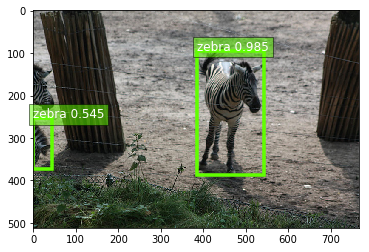

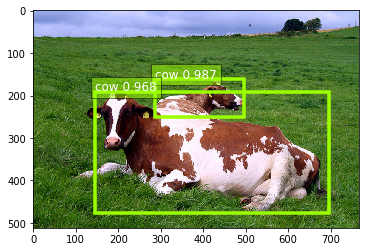

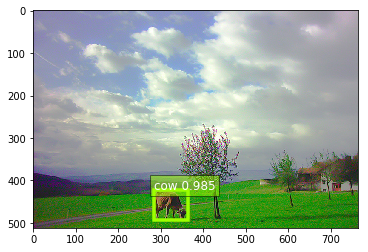

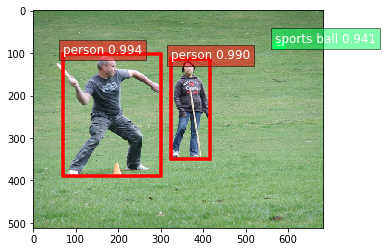

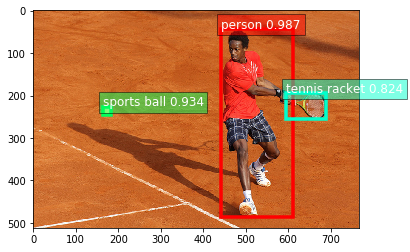

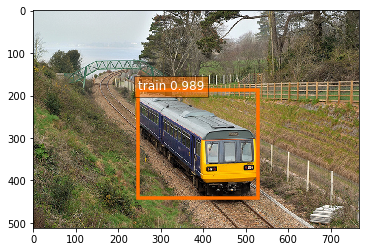

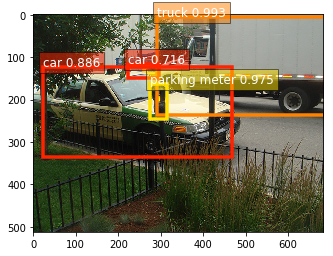

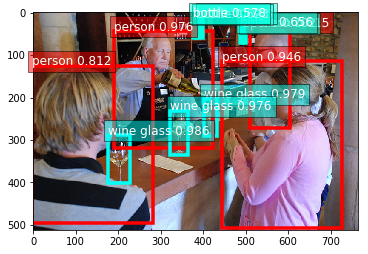

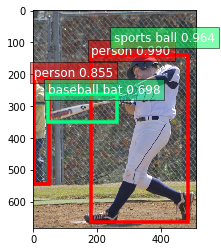

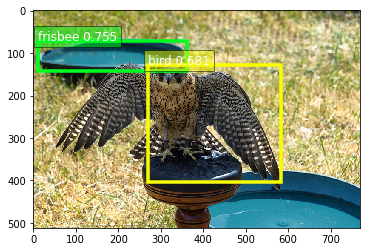

In [26]:
for image in test_filenames:
    baseline_model.classify_objects(data_folder + image)

In [5]:
!pip install gluoncv

In [9]:
help('modules')


Please wait a moment while I gather a list of all available modules...



/home/muthderd/anaconda3/lib/python3.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/home/muthderd/anaconda3/lib/python3.7/site-packages/odo/backends/pandas.py:102: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))
/home/muthderd/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:22: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  "The twython library has not been installed. "


cc1plus: warning: command line option ‘-Wstrict-prototypes’ is valid for C/ObjC but not for C++
DEBUG:pip._internal.vcs:Registered VCS backend: git
DEBUG:pip._internal.vcs:Registered VCS backend: hg
DEBUG:pip._internal.vcs:Registered VCS backend: svn
DEBUG:pip._internal.vcs:Registered VCS backend: bzr


/home/muthderd/anaconda3/lib/python3.7/site-packages/skimage/novice/__init__.py:103: UserWarning: The `skimage.novice` module was deprecated in version 0.14. It will be removed in 0.16.
  warnings.warn("The `skimage.novice` module was deprecated in version 0.14. "
/home/muthderd/anaconda3/lib/python3.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "
/home/muthderd/anaconda3/lib/python3.7/site-packages/sphinx/websupport/__init__.py:25: RemovedInSphinx20Warning: sphinx.websupport module is now provided as sphinxcontrib-websupport. sphinx.websupport will be removed at Sphinx-2.0. Please use the package instead.
  RemovedInSphinx20Warning)


Crypto              brain_io            jinja2              resource
Cython              brain_mechanize     json                rlcompleter
IPython             brain_multiprocessing jsonschema          rmagic
OpenSSL             brain_namedtuple_enum jupyter             rope
PIL                 brain_nose          jupyter_client      ruamel_yaml
PyQt5               brain_numpy         jupyter_console     runpy
__future__          brain_pkg_resources jupyter_core        sched
_abc                brain_pytest        jupyterlab          scipy
_ast                brain_qt            jupyterlab_server   scripts
_asyncio            brain_random        keyring             seaborn
_bisect             brain_re            keyword             secrets
_blake2             brain_six           kiwisolver          secretstorage
_bootlocale         brain_ssl           lazy_object_proxy   select
_bz2                brain_subprocess    lib2to3             selectors
_cffi_backend       brain_threading   

/home/muthderd/anaconda3/lib/python3.7/pkgutil.py:107: VisibleDeprecationWarning: zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    
  yield from walk_packages(path, info.name+'.', onerror)


In [2]:
from gluoncv import model_zoo, data, utils
#from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

#file_name = 'C:\MIDS\computer-vision-for-ewaste\data\sample_image_01.jpg'
#file_name = '/mnt/muthderd/MIDS/W210/data/test2017/000000000001.jpg'
file_name = '/mnt/muthderd/MIDS/W210/computer-vision-for-ewaste/data/sample_image_01.jpg'

In [3]:
x, img = data.transforms.presets.ssd.load_test(file_name, short=512)

In [4]:
x.shape

(1, 3, 512, 782)

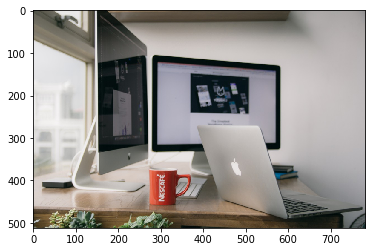

In [5]:
ax = utils.viz.plot_image(img)
plt.show()

In [6]:
#bbox = [xmin, ymin, xmax, ymax]
laptop_label = [375, 500, 800, 250]

In [7]:
all_boxes = np.array([laptop_label])
all_ids = np.array([0])
class_names = ['laptop']

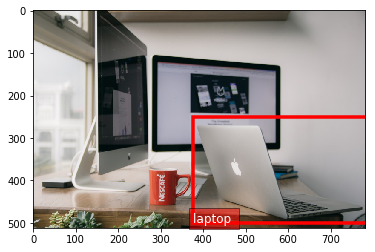

In [8]:
ax = utils.viz.plot_bbox(img, all_boxes, labels=all_ids, class_names=class_names)
plt.show()

In [9]:
def write_line(img_path, im_shape, boxes, ids, idx):
    h, w, c = im_shape
    # for header, we use minimal length 2, plus width and height
    # with A: 4, B: 5, C: width, D: height
    A = 4
    B = 5
    C = w
    D = h
    # concat id and bboxes
    labels = np.hstack((ids.reshape(-1, 1), boxes)).astype('float')
    # normalized bboxes (recommanded)
    labels[:, (1, 3)] /= float(w)
    labels[:, (2, 4)] /= float(h)
    # flatten
    labels = labels.flatten().tolist()
    str_idx = [str(idx)]
    str_header = [str(x) for x in [A, B, C, D]]
    str_labels = [str(x) for x in labels]
    str_path = [img_path]
    line = '\t'.join(str_idx + str_header + str_labels + str_path) + '\n'
    return line

In [10]:
write_line(file_name, img.shape, all_boxes, all_ids, 0)

'0\t4\t5\t782\t512\t0.0\t0.479539641943734\t0.9765625\t1.0230179028132993\t0.48828125\t/mnt/muthderd/MIDS/W210/computer-vision-for-ewaste/data/sample_image_01.jpg\n'

In [11]:
print(file_name)

/mnt/muthderd/MIDS/W210/computer-vision-for-ewaste/data/sample_image_01.jpg


In [12]:
#with open('C:\MIDS\computer-vision-for-ewaste\data\\val.lst', 'w') as fw:
with open('C:\MIDS\computer-vision-for-ewaste\data\\val.lst', 'w') as fw:
    for i in range(1):
        line = write_line(file_name, img.shape, all_boxes, all_ids, i)
        print(line)
        fw.write(line)

0	4	5	782	512	0.0	0.479539641943734	0.9765625	1.0230179028132993	0.48828125	/mnt/muthderd/MIDS/W210/computer-vision-for-ewaste/data/sample_image_01.jpg



In [13]:
with open('C:\MIDS\computer-vision-for-ewaste\data\\val.lst', 'rb') as fw:
    print(fw.read())

b'0\t4\t5\t782\t512\t0.0\t0.479539641943734\t0.9765625\t1.0230179028132993\t0.48828125\t/mnt/muthderd/MIDS/W210/computer-vision-for-ewaste/data/sample_image_01.jpg\n'


In [5]:
net = model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)
x, img = data.transforms.presets.yolo.load_test(file_name, short=512)
class_ids, scores, bounding_boxes = net(x)

Model file is not found. Downloading.


SSLError: HTTPSConnectionPool(host='apache-mxnet.s3-accelerate.dualstack.amazonaws.com', port=443): Max retries exceeded with url: /gluon/models/yolo3_darknet53_coco-09767802.zip (Caused by SSLError(SSLError("bad handshake: SysCallError(10054, 'WSAECONNRESET')",),))

In [ ]:
file_name[:-4]

In [ ]:
len(bounding_boxes[0])

In [92]:
class_id_series = pd.Series(class_ids[0].asnumpy().reshape(len(class_ids[0]),))
score_series = pd.Series(scores[0].asnumpy().reshape(len(scores[0]),))
b_box_DF = pd.DataFrame(bounding_boxes[0].asnumpy().reshape(len(bounding_boxes[0]),4), columns=[1,2,3,4])

In [95]:
class_id_series[class_id_series>-1]

0     7.0
1    12.0
2     2.0
3     2.0
4     7.0
5     7.0
6     0.0
7     0.0
dtype: float32

In [96]:
score_series[class_id_series>-1]

0    0.992751
1    0.975179
2    0.886393
3    0.716238
4    0.071023
5    0.052176
6    0.023853
7    0.022163
dtype: float32

In [97]:
b_box_DF[class_id_series>-1]

1           2           3           4
0  291.151245    6.016182  692.012146  237.544739
1  275.478699  164.854691  315.381348  245.706558
2   23.073624  124.311089  469.206543  336.812927
3  223.665680  117.287094  296.979095  149.851212
4   43.002121  116.329735  483.970459  320.998718
5  223.665680  117.287094  296.979095  149.851212
6  397.505402   67.566521  410.538116   96.463463
7  379.965454   67.362923  408.599487   97.954933

In [115]:
test_annotations = b_box_DF[class_id_series>-1]

In [116]:
test_annotations['class_id'] = class_id_series[class_id_series>-1]
test_annotations['scores'] = score_series[class_id_series>-1]

/home/muthderd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/muthderd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
test_annotations['image_id'] = [file_name[:-4]]*len(test_annotations)

/home/muthderd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
test_annotations = test_annotations[['image_id', 'class_id', 'scores', 1, 2, 3, 4]]
test_annotations

image_id  class_id    scores  \
0  /home/muthderd/MIDS/W210/data/test2017/0000000...       7.0  0.992751   
1  /home/muthderd/MIDS/W210/data/test2017/0000000...      12.0  0.975179   
2  /home/muthderd/MIDS/W210/data/test2017/0000000...       2.0  0.886393   
3  /home/muthderd/MIDS/W210/data/test2017/0000000...       2.0  0.716238   
4  /home/muthderd/MIDS/W210/data/test2017/0000000...       7.0  0.071023   
5  /home/muthderd/MIDS/W210/data/test2017/0000000...       7.0  0.052176   
6  /home/muthderd/MIDS/W210/data/test2017/0000000...       0.0  0.023853   
7  /home/muthderd/MIDS/W210/data/test2017/0000000...       0.0  0.022163   

            1           2           3           4  
0  291.151245    6.016182  692.012146  237.544739  
1  275.478699  164.854691  315.381348  245.706558  
2   23.073624  124.311089  469.206543  336.812927  
3  223.665680  117.287094  296.979095  149.851212  
4   43.002121  116.329735  483.970459  320.998718  
5  223.665680  117.287094  296.979095  149.851212  
6  397.505402   67.566521  410.538116   96.463463  
7  379.965454   67.362923  408.599487   97.954933

In [112]:
test_annotations['image_id'] = [file_name[:-4]]*len(test_annotations)

In [120]:
all_test_annotations = pd.DataFrame(columns=['image_id', 'class_id', 'scores', 1, 2, 3, 4])

In [121]:
all_test_annotations

Empty DataFrame
Columns: [image_id, class_id, scores, 1, 2, 3, 4]
Index: []

In [122]:
all_test_annotations = pd.concat([all_test_annotations, test_annotations], ignore_index=True)

In [123]:
all_test_annotations

image_id  class_id    scores  \
0  /home/muthderd/MIDS/W210/data/test2017/0000000...       7.0  0.992751   
1  /home/muthderd/MIDS/W210/data/test2017/0000000...      12.0  0.975179   
2  /home/muthderd/MIDS/W210/data/test2017/0000000...       2.0  0.886393   
3  /home/muthderd/MIDS/W210/data/test2017/0000000...       2.0  0.716238   
4  /home/muthderd/MIDS/W210/data/test2017/0000000...       7.0  0.071023   
5  /home/muthderd/MIDS/W210/data/test2017/0000000...       7.0  0.052176   
6  /home/muthderd/MIDS/W210/data/test2017/0000000...       0.0  0.023853   
7  /home/muthderd/MIDS/W210/data/test2017/0000000...       0.0  0.022163   

            1           2           3           4  
0  291.151245    6.016182  692.012146  237.544739  
1  275.478699  164.854691  315.381348  245.706558  
2   23.073624  124.311089  469.206543  336.812927  
3  223.665680  117.287094  296.979095  149.851212  
4   43.002121  116.329735  483.970459  320.998718  
5  223.665680  117.287094  296.979095  149.851212  
6  397.505402   67.566521  410.538116   96.463463  
7  379.965454   67.362923  408.599487   97.954933